# Breadth-first search (BFS) 

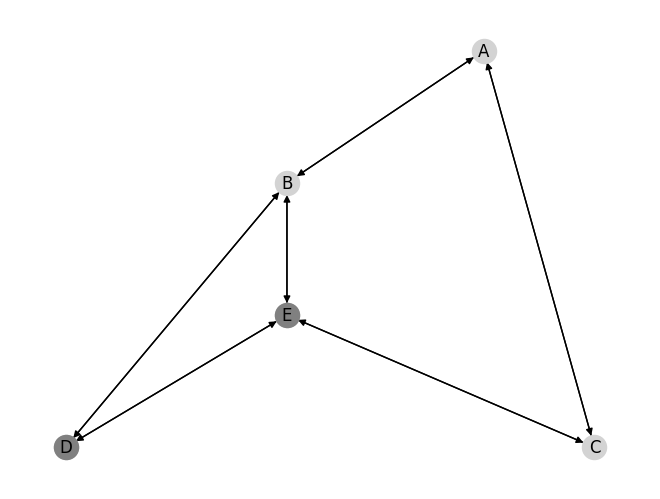

In [3]:
import networkx as nx
# G is a graph represented as an adjancency list. 
# G is a hash table (dictionary) with each node as a key, and value, the list of adjacent nodes
G={'A':['B','C'],'B':['A','D','E'],'C':['A','E'],'D':['B','E'],'E':['B','C','D']}
source='A'
Target=['D','E']
nxG=nx.DiGraph(G)
pos_nodes = nx.nx_agraph.pygraphviz_layout(nxG,prog='dot',root=source)
nx.draw(nxG,pos=pos_nodes, with_labels=True, node_color="lightgray")
nx.draw_networkx_nodes(G,pos=pos_nodes, nodelist=Target, node_color='gray')


## BFS algorithm
BFS(G,source)  
> Open = Queue(source)  
> Closed = $\emptyset$  
> while Open $\neq \emptyset$
>> s = Unqueue(Open)  
>> Closed = Closed $\cup$ $\{s\}$  
>> for n $\in$ Adjacents(G,s)  
>>> if n $\notin$ Closed  
>>>> if n $\notin$ Open  
>>>>> if Target(n) return n  
>>>>> Append(Open,n)  
> return NULL

### BFS implementation interactively showing the sequence of nodes visited 

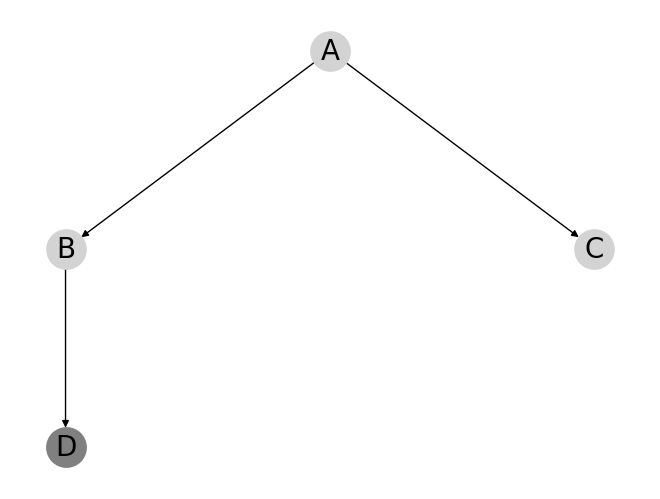

D


In [6]:
from IPython.display import clear_output
import matplotlib.pyplot as plt

def idraw_graph(DG, source, target=[]):
  clear_output()
  nxDG=nx.DiGraph(DG)
  pos_nodes = nx.nx_agraph.pygraphviz_layout(nxDG,prog='dot',root=source)
  nx.draw(nxDG,pos=pos_nodes, with_labels=True, node_color="lightgray", node_size=800, font_size=20)
  nx.draw_networkx_nodes(DG,pos=pos_nodes, nodelist=target, node_color='gray', node_size=800)
  plt.show()
  input()

# G is a graph represented as an adjancency list. 
# source is the label (string) of the source node
# target is the list of target nodes
def bfs(G, source, Target):
  DG={source:[]}
  idraw_graph(DG, source)
  if source in Target:
    return source, DG
  # Open is a list of nodes to be visited. FIFO list of nodes
  Open = []; Open.append(source)
  # Closed is a list of visited nodes.  FIFO list of nodes
  Closed = []; 
	
  while Open != []:
    # Extract node from the the head of the Open list
    node = Open.pop(0)
    # Append node at the end of the Closed list
    Closed.append(node)
    Adj = DG[node]
    # For each adjacent node
    for child in G[node]:
      if child not in Closed:
        if child not in Open:
          Adj.append(child); DG[node]=Adj
          DG.update({child:[]})
          if child in Target:
            idraw_graph(DG, source, [child])
            return child
          Open.append(child)
          idraw_graph(DG, source)
          
				
print(bfs(G,source,Target))